In [ ]:
#Importing relevant Python libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#A function for extracting interaction energetic values from a data file
#Input: the path of the data file
#Output: a dataframe with the energetic values, each contained within a specific column according to the correpsonding energy term (Coulomb, Van der Waals (LJ))
def Generate_Interaction_Energies_df(file_name):
    
    #Reading the data file as lists
    y = np.loadtxt(file_name, comments = ['@', '#'], unpack = True)
    lists = []
    for i in range(len(y)):
        lists.append(list(y[i]))

    #Inserting the lists to a dictionary, which would be converted to a dataframe with suitable column names, according to the energy term
    d = {}
    for i in range(len(lists)):
        d[i] = lists[i]
    df = pd.DataFrame(d)
    df.set_index(0, inplace=True)
    if len(df.columns) == 4:
        df.columns = ['PD Coul-SR', 'PD LJ-SR', 'PD Coul-14', 'PD LJ-14']
    elif len(df.columns) == 12:
        df.columns = ['PP Coul-SR', 'PP LJ-SR', 'PP Coul-14', 'PP LJ-14', 'PD Coul-SR', 'PD LJ-SR', 'PD Coul-14', 'PD LJ-14', 'DD Coul-SR', 'DD LJ-SR', 'DD Coul-14', 'DD LJ-14']

    #Returning the dataframe    
    return df

#A function for convering multiple interaction energy data files to multiple corresponding dataframes, utilizing the above function
#Input: a list with the paths of the data files
#Output: a list with the dataframes of the energetic values, each contained within a specific column according to the correpsonding energy term (Coulomb, Van der Waals (LJ))
def from_files_to_dfs(two_files_list):

    #Utilizing the above function, converting each energy file in the input list to a corresponding dataframe, stored in an output list of dataframes
    dfs_list = []
    for i in range(len(two_files_list)):
        dfs_list.append(Generate_Interaction_Energies_df(two_files_list[i]))

    #Returning the output list of dataframes
    return dfs_list

In [ ]:
#Reading the interaction energy and bending (angle and ratio) data of the AT-rich DNA sequence (AT-rich 1)

#Reading and processing the interaction energy files
energy_first_try_I = np.loadtxt("/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_200ns_first_replicate_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_II = np.loadtxt("/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_200ns_second_replicate_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_III = np.loadtxt("/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_200ns_third_replicate_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_IV = np.loadtxt("/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_energy.xvg", comments = ['@', '#', '&'], unpack = True)
binding_values_AT_NMG_I = list(energy_first_try_I[5])
binding_values_AT_NMG_II = list(energy_first_try_II[5])
binding_values_AT_NMG_III = list(energy_first_try_III[5])
binding_values_AT_NMG_IV = list(energy_first_try_IV[2])

#Reading and processing the bending ratio files, getting a unified dataframe of values
first_one_strand_distance_first_try_x_I, first_one_strand_distance_first_try_y_I = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/first_strand_distance_I.xvg', comments = ['@', '#', '&'], unpack = True)
second_one_strand_distance_first_try_x_I, second_one_strand_distance_first_try_y_I = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/second_strand_distance_I.xvg', comments = ['@', '#', '&'], unpack = True)
ratios_first_second_I = [first_one_strand_distance_first_try_y_I[i] / second_one_strand_distance_first_try_y_I[i] for i in range(len(first_one_strand_distance_first_try_x_I))]
first_one_strand_distance_first_try_x_II, first_one_strand_distance_first_try_y_II = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/first_strand_distance_II.xvg', comments = ['@', '#', '&'], unpack = True)
second_one_strand_distance_first_try_x_II, second_one_strand_distance_first_try_y_II = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/second_strand_distance_II.xvg', comments = ['@', '#', '&'], unpack = True)
ratios_first_second_II = [first_one_strand_distance_first_try_y_II[i] / second_one_strand_distance_first_try_y_II[i] for i in range(len(first_one_strand_distance_first_try_x_II))]
first_one_strand_distance_first_try_x_III, first_one_strand_distance_first_try_y_III = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/first_strand_distance_III.xvg', comments = ['@', '#', '&'], unpack = True)
second_one_strand_distance_first_try_x_III, second_one_strand_distance_first_try_y_III = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/second_strand_distance_III.xvg', comments = ['@', '#', '&'], unpack = True)
ratios_first_second_III = [first_one_strand_distance_first_try_y_III[i] / second_one_strand_distance_first_try_y_III[i] for i in range(len(first_one_strand_distance_first_try_x_III))]
bending_ratios_AT_NMG_I = list(ratios_first_second_I)
bending_ratios_AT_NMG_II = list(ratios_first_second_II)
bending_ratios_AT_NMG_III = list(ratios_first_second_III)
bending_ratios_AT_NMG_unified = bending_ratios_AT_NMG_I + bending_ratios_AT_NMG_II + bending_ratios_AT_NMG_III
bending_ratios_AT_NMG_unified_df = pd.DataFrame(bending_ratios_AT_NMG_unified, columns = ['data'])

#Reading and processing the bending angle files, getting a unified dataframe of values
bending_angle_first_try_x_I, bending_angle_first_try_y_I = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/bending_angle_DDD_NMG_replicates_I.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_II, bending_angle_first_try_y_II = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/bending_angle_DDD_NMG_replicates_II.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_III, bending_angle_first_try_y_III = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3_replicates/bending_angle_DDD_NMG_replicates_III.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_IV, bending_angle_first_try_y_IV = np.loadtxt('/trajectories/yoav/Hfq_DDD_NMG_3/bending_angle_DDD_NMG_3_I.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angles_AT_NMG_I = list(bending_angle_first_try_y_I)
bending_angles_AT_NMG_II = list(bending_angle_first_try_y_II)
bending_angles_AT_NMG_III = list(bending_angle_first_try_y_III)
bending_angles_AT_NMG_IV = list(bending_angle_first_try_y_IV)
bending_angles_AT_NMG_unified = bending_angles_AT_NMG_I + bending_angles_AT_NMG_II + bending_angles_AT_NMG_III
bending_angles_AT_NMG_unified_df = pd.DataFrame(bending_angles_AT_NMG_unified, columns = ['data'])

In [6]:
#Reading the interaction energy and bending (angle and ratio) data of the GC-rich DNA sequence (GC-rich 1)

#Reading and processing the interaction energy files
energy_first_try_GC_I = np.loadtxt("/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_300ns_1_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_GC_II = np.loadtxt("/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_300ns_2_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_GC_III = np.loadtxt("/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_300ns_3_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_GC_IV = np.loadtxt("/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_1_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_GC_V = np.loadtxt("/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_2_energy.xvg", comments = ['@', '#', '&'], unpack = True)
energy_first_try_GC_VI = np.loadtxt("/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_3_energy.xvg", comments = ['@', '#', '&'], unpack = True)
binding_values_GC_I = list(energy_first_try_GC_I[5])
binding_values_GC_II = list(energy_first_try_GC_II[5])
binding_values_GC_III = list(energy_first_try_GC_III[5])
binding_values_GC_IV = list(energy_first_try_GC_IV[5])
binding_values_GC_V = list(energy_first_try_GC_V[5])
binding_values_GC_VI = list(energy_first_try_GC_VI[5])

#Reading and processing the bending ratio files, getting a unified dataframe of values
first_one_strand_distance_first_try_x_GC_I, first_one_strand_distance_first_try_y_GC_I = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns/first_strand_distance_I.xvg', comments = ['@', '#', '&'], unpack = True)
second_one_strand_distance_first_try_x_GC_I, second_one_strand_distance_first_try_y_GC_I = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns/second_strand_distance_I.xvg', comments = ['@', '#', '&'], unpack = True)
ratios_first_second_GC_I = [first_one_strand_distance_first_try_y_GC_I[i] / second_one_strand_distance_first_try_y_GC_I[i] for i in range(len(first_one_strand_distance_first_try_x_GC_I))]
first_one_strand_distance_first_try_x_GC_II, first_one_strand_distance_first_try_y_GC_II = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns_2/first_strand_distance_II.xvg', comments = ['@', '#', '&'], unpack = True)
second_one_strand_distance_first_try_x_GC_II, second_one_strand_distance_first_try_y_GC_II = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns_2/second_strand_distance_II.xvg', comments = ['@', '#', '&'], unpack = True)
ratios_first_second_GC_II = [first_one_strand_distance_first_try_y_GC_II[i] / second_one_strand_distance_first_try_y_GC_II[i] for i in range(len(first_one_strand_distance_first_try_x_GC_II))]
first_one_strand_distance_first_try_x_GC_III, first_one_strand_distance_first_try_y_GC_III = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns_3/first_strand_distance_III.xvg', comments = ['@', '#', '&'], unpack = True)
second_one_strand_distance_first_try_x_GC_III, second_one_strand_distance_first_try_y_GC_III = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns_3/second_strand_distance_III.xvg', comments = ['@', '#', '&'], unpack = True)
ratios_first_second_GC_III = [first_one_strand_distance_first_try_y_GC_III[i] / second_one_strand_distance_first_try_y_GC_III[i] for i in range(len(first_one_strand_distance_first_try_x_GC_III))]
bending_ratios_GC_I = list(ratios_first_second_GC_I)
bending_ratios_GC_II = list(ratios_first_second_GC_II)
bending_ratios_GC_III = list(ratios_first_second_GC_III)
bending_ratios_GC_unified = bending_ratios_GC_I + bending_ratios_GC_II + bending_ratios_GC_III
bending_ratios_GC_unified_df = pd.DataFrame(bending_ratios_GC_unified, columns = ['data'])

#Reading and processing the bending angle files, getting a unified dataframe of values
bending_angle_first_try_x_GC_I, bending_angle_first_try_y_GC_I = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns/bending_angle_DDD_GGCC_300ns_I.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_GC_II, bending_angle_first_try_y_GC_II = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns_2/bending_angle_DDD_GGCC_300ns_II.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_GC_III, bending_angle_first_try_y_GC_III = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_300ns_3/bending_angle_DDD_GGCC_300ns_III.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_GC_IV, bending_angle_first_try_y_GC_IV = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC/bending_angle_DDD_GGCC_I.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_GC_V, bending_angle_first_try_y_GC_V = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_2/bending_angle_DDD_GGCC_II.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angle_first_try_x_GC_VI, bending_angle_first_try_y_GC_VI = np.loadtxt('/trajectories/yoav/Hfq_DDD_GGCC_3/bending_angle_DDD_GGCC_III.xvg', comments = ['@', '#', '&'], unpack = True)
bending_angles_GC_I = list(bending_angle_first_try_y_GC_I)
bending_angles_GC_II = list(bending_angle_first_try_y_GC_II)
bending_angles_GC_III = list(bending_angle_first_try_y_GC_III)
bending_angles_GC_IV = list(bending_angle_first_try_y_GC_IV)
bending_angles_GC_V = list(bending_angle_first_try_y_GC_V)
bending_angles_GC_VI = list(bending_angle_first_try_y_GC_VI)
bending_angles_GC_unified = bending_angles_GC_I + bending_angles_GC_VI + bending_angles_GC_V + bending_angles_GC_III
bending_angles_GC_unified_df = pd.DataFrame(bending_angles_GC_unified, columns = ['data'])

In [17]:
#A function for dissecting the interaction energy data according to the corresponding bending angle at the same timepoint - low/medium/high bending angle
#Input: bending data (according to simulation copies); binding/interaction energy data (according to simulation copies); percentile thresholds for defining low/medium/high bending
#Output: three dataframes, each corresponds to a bending degree (low/medium/high) and contains both bending and binding/interaction energy values
def get_groups(bending_copies, binding_copies, thresholds):

    #Defining the designed lists of energies and bending values to be inserted to the output dictionaries
    low_bending_energies = []; medium_bending_energies = []; high_bending_energies = []
    low_bending = []; medium_bending = []; high_bending = []

    #Assigning the energies and bending values to the designed lists according to the defined thresholds
    for k in range(len(bending_copies)):
        bending_copy = bending_copies[k]
        binding_copy = binding_copies[k]
        for i_x in range(len(bending_copy)):
            if bending_copy[i_x] < thresholds[0]:
                low_bending_energies.append(binding_copy[i_x])
                low_bending.append(bending_copy[i_x])
            elif thresholds[0] <= bending_copy[i_x] < thresholds[1]:
                medium_bending_energies.append(binding_copy[i_x])
                medium_bending.append(bending_copy[i_x])
            elif thresholds[1] <= bending_copy[i_x]:
                high_bending_energies.append(binding_copy[i_x])
                high_bending.append(bending_copy[i_x])
        low_bending_d = {'bending': low_bending, 'data': low_bending_energies}; medium_bending_d = {'bending': medium_bending, 'data': medium_bending_energies}; high_bending_d = {'bending': high_bending, 'data': high_bending_energies}
    
        #Returning the output dataframes
        return pd.DataFrame(low_bending_d), pd.DataFrame(medium_bending_d), pd.DataFrame(high_bending_d)

#A function for getting the thresholds of low, medium and high percentiles of a given bending angle distribution
#Input: a bending angle distribution
#Output: thresholds of low, medium and high bending
def get_thresholds(bending_list):

    #Returning the thresholds, defined based on the 15th and 85th percentiles
    return np.percentile(bending_list, 15), np.percentile(bending_list, 85)

#Getting the energetic values of both the AT-rich and GC-rich sequences
energies_AT_NMG_copies = [binding_values_AT_NMG_I, binding_values_AT_NMG_II, binding_values_AT_NMG_III, binding_values_AT_NMG_IV]
energies_GC_copies = [binding_values_GC_I, binding_values_GC_VI, binding_values_GC_V, binding_values_GC_III]

#Getting the bending angle values of both the AT-rich and GC-rich sequences
bending_angle_AT_NMG_copies = [bending_angles_AT_NMG_I, bending_angles_AT_NMG_II, bending_angles_AT_NMG_III, bending_angles_AT_NMG_IV]
bending_angle_GC_copies = [bending_angles_GC_I, bending_angles_GC_VI, bending_angles_GC_V, bending_angles_GC_III]

#Getting the bending ratio values of both the AT-rich and GC-rich sequences
bending_ratio_AT_NMG_copies = [bending_ratios_AT_NMG_I, bending_ratios_AT_NMG_II, bending_ratios_AT_NMG_III]
bending_ratio_GC_copies = [bending_ratios_GC_I, bending_ratios_GC_II, bending_ratios_GC_III]

#Getting the bending angle thresholds of both the AT-rich and GC-rich sequences
thresholds_bending_angle_AT_NMG = get_thresholds(bending_angles_AT_NMG_unified)
thresholds_bending_angle_GC = get_thresholds(bending_angles_GC_unified)
thresholds_bending_ratio_AT_NMG = get_thresholds(bending_ratios_AT_NMG_unified)
thresholds_bending_ratio_GC = get_thresholds(bending_ratios_GC_unified)

#Getting the low, medium and high bending angle dataframes of both the AT-rich and GC-rich sequences, based on the defined above function and given thresholds
low_bending_angle_AT_NMG_energies, medium_bending_angle_AT_NMG_energies, high_bending_angle_AT_NMG_energies = get_groups(bending_angle_AT_NMG_copies, energies_AT_NMG_copies, thresholds_bending_angle_AT_NMG)
low_bending_angle_GC_energies, medium_bending_angle_GC_energies, high_bending_angle_GC_energies = get_groups(bending_angle_GC_copies, energies_GC_copies, thresholds_bending_angle_GC)
low_bending_ratio_AT_NMG_energies, medium_bending_ratio_AT_NMG_energies, high_bending_ratio_AT_NMG_energies = get_groups(bending_ratio_AT_NMG_copies, energies_AT_NMG_copies, thresholds_bending_ratio_AT_NMG)
low_bending_ratio_GC_energies, medium_bending_ratio_GC_energies, high_bending_ratio_GC_energies = get_groups(bending_ratio_GC_copies, energies_GC_copies, thresholds_bending_ratio_GC)

In [ ]:
#Summing up all AT-rich energies to a list
all_AT_energies = []
for y in energies_AT_NMG_copies:
    for x in y:
        all_AT_energies.append(x)

#Summing up all GC-rich energies to a list
all_GC_energies = []
for y in energies_GC_copies:
    for x in y:
        all_GC_energies.append(x)

#Summing up all AT-rich bending angles to a list
all_AT_angles = []
for y in bending_angle_AT_NMG_copies:
    for x in y:
        all_AT_angles.append(x)

#Summing up all GC-rich bending angles to a list
all_GC_angles = []
for y in bending_angle_GC_copies:
    for x in y:
        all_GC_angles.append(x)

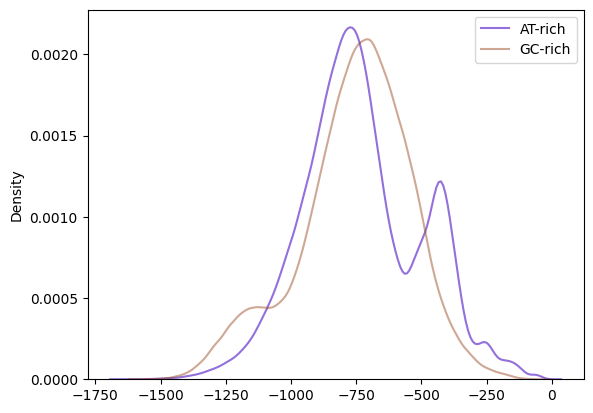

In [13]:
#Plotting the energy densities of both the AT-rich and GC-rich sequences - panel S2A
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(all_AT_energies, color = 'mediumpurple', label = 'AT-rich')
sns.kdeplot(all_GC_energies, color = 'sienna', label = 'GC-rich', alpha = 0.5)
plt.legend()
plt.savefig('Binding_AT_GC_Densities_Upload.pdf', format = 'pdf')

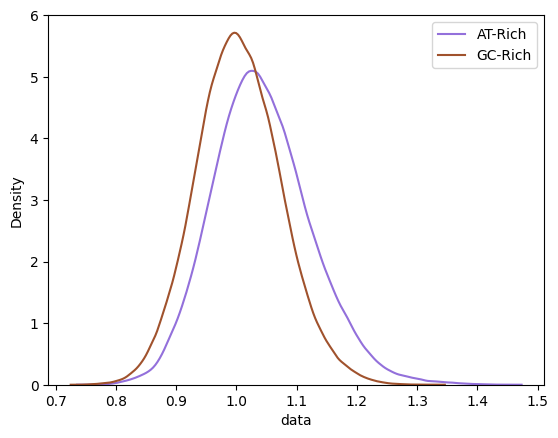

In [14]:
#Plotting the bending ratio densities of both the AT-rich and GC-rich sequences - panel S3B
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(data = bending_ratios_AT_NMG_unified_df, x = 'data', label = 'AT-Rich', color = 'mediumpurple', fill = False)
sns.kdeplot(data = bending_ratios_GC_unified_df, x = 'data', label = 'GC-Rich', color = 'sienna', fill = False)
plt.legend()
plt.savefig('Bending_Ratio_Density_Plots_Different_B_DNA_Molecules_Upload.pdf', format = 'pdf')

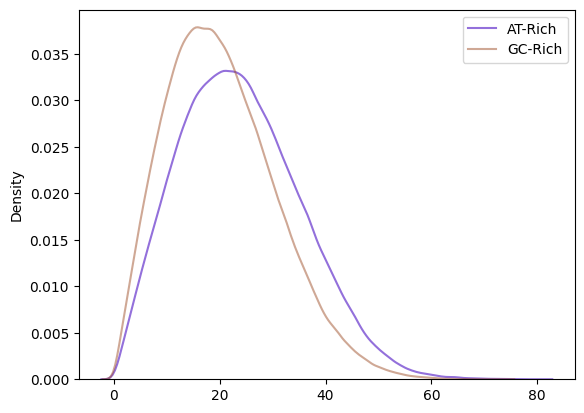

In [ ]:
#Plotting the bending angle densities of both the AT-rich and GC-rich sequences - panel S2B
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(all_AT_angles, label = 'AT-Rich', color = 'mediumpurple')
sns.kdeplot(all_GC_angles, label = 'GC-Rich', color = 'sienna', alpha = 0.5)
plt.legend()
plt.savefig('Bending_AT_GC_Densities_Upload.pdf', format = 'pdf')

/tmp/ipykernel_294736/3026762266.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax = ax, x = ratios_first_second_I + ratios_first_second_II + ratios_first_second_III, y = list(bending_angle_first_try_y_I) + list(bending_angle_first_try_y_II) + list(bending_angle_first_try_y_III), color = 'mediumpurple', alpha = 1, label = 'dDDD AT-Rich', hue_norm = (0, 1), log_scale = False, shade = False, cbar = True)
/tmp/ipykernel_294736/3026762266.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax = ax, x = ratios_first_second_GC_I + ratios_first_second_GC_II + ratios_first_second_GC_III, y =  list(bending_angle_first_try_y_GC_I) + list(bending_angle_first_try_y_GC_II) + list(bending_angle_first_try_y_GC_III), color = 'sienna', alpha = 0.5, lab

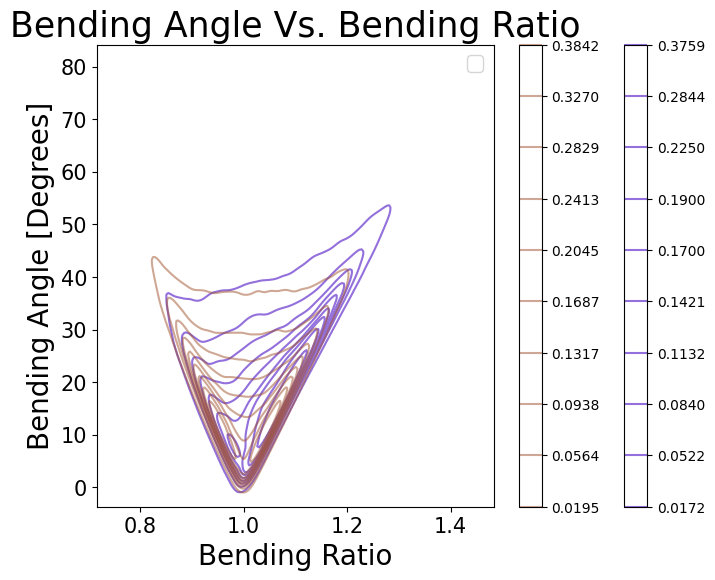

In [ ]:
#Plotting the bending ratio vs. bending angle densities of both the AT-rich and GC-rich sequences - panel S3A (only for the three simulation copies)
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize = (8, 6))
sns.kdeplot(ax = ax, x = ratios_first_second_I + ratios_first_second_II + ratios_first_second_III, y = list(bending_angle_first_try_y_I) + list(bending_angle_first_try_y_II) + list(bending_angle_first_try_y_III), color = 'mediumpurple', alpha = 1, label = 'dDDD AT-Rich', hue_norm = (0, 1), log_scale = False, shade = False, cbar = True)
sns.kdeplot(ax = ax, x = ratios_first_second_GC_I + ratios_first_second_GC_II + ratios_first_second_GC_III, y =  list(bending_angle_first_try_y_GC_I) + list(bending_angle_first_try_y_GC_II) + list(bending_angle_first_try_y_GC_III), color = 'sienna', alpha = 0.5, label = 'GC-Rich', hue_norm = (0, 1), log_scale = False, shade = False, cbar = True)
ax.set_xlabel('Bending Ratio', fontsize = 20)
ax.set_ylabel('Bending Angle [Degrees]', fontsize = 20)
ax.set_title('Bending Angle Vs. Bending Ratio', fontsize = 25)
ax.legend(fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 15)
fig.savefig('Bending Angle_Vs_Bending_Ratio_Upload.pdf', format = 'pdf')

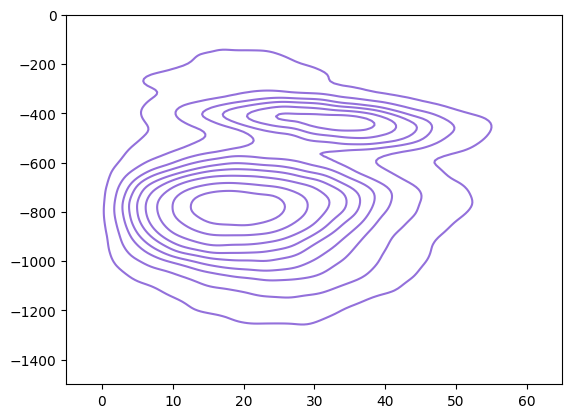

In [19]:
#Plotting 2D KDE plot of binding/interaction energy vs. bending angle of the AT-rich sequence - panel 4B
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(x = all_AT_angles, y = all_AT_energies, color = 'mediumpurple')
plt.xlim([-5, 65])
plt.ylim([-1500, 0])
plt.savefig('KDE_Plot_AT_Binding_Bending_Upload.pdf', format = 'pdf')

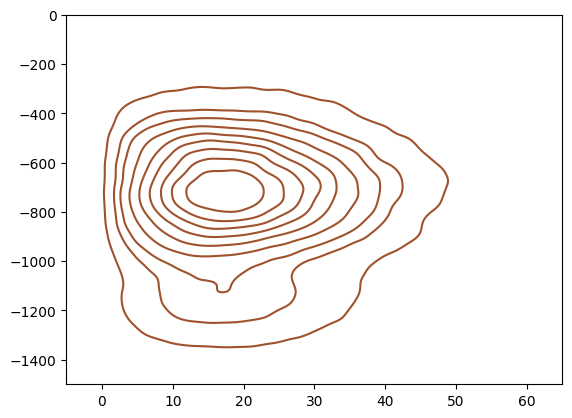

In [20]:
#Plotting 2D KDE plot of binding/interaction energy vs. bending angle of the GC-rich sequence - panel 4B
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(x = all_GC_angles, y = all_GC_energies, color = 'sienna')
plt.xlim([-5, 65])
plt.ylim([-1500, 0])
plt.savefig('KDE_Plot_GC_Binding_Bending_Upload.pdf', format = 'pdf')

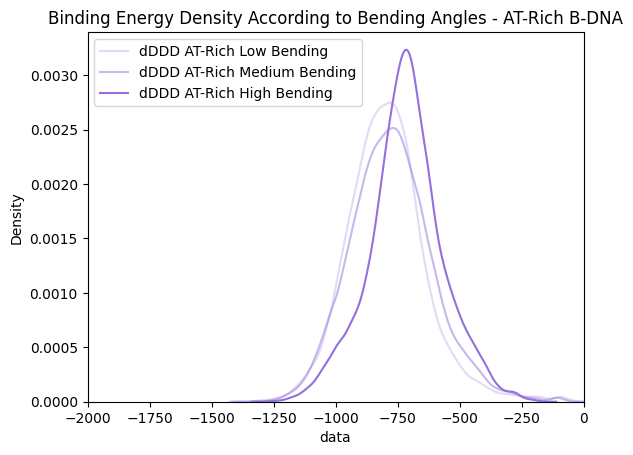

In [21]:
#Plotting 1D KDE plot depciting low/medium/high bending angles of the AT-rich sequence - panel S2C
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(data = low_bending_angle_AT_NMG_energies, x = 'data', label = 'dDDD AT-Rich Low Bending', color = 'mediumpurple', alpha = 0.25, fill = False)
sns.kdeplot(data = medium_bending_angle_AT_NMG_energies, x = 'data', label = 'dDDD AT-Rich Medium Bending', color = 'mediumpurple', alpha = 0.5, fill = False)
sns.kdeplot(data = high_bending_angle_AT_NMG_energies, x = 'data', label = 'dDDD AT-Rich High Bending', color = 'mediumpurple', alpha = 1, fill = False)
plt.legend()
plt.xlim([-2000, 0])
plt.title('Binding Energy Density According to Bending Angles - AT-Rich B-DNA')
plt.savefig('Binding_Energy_Density_Different_Bending_Angles_AT_Rich_B_DNA_Coul_0.15Thr_Upload.pdf', format = 'pdf')

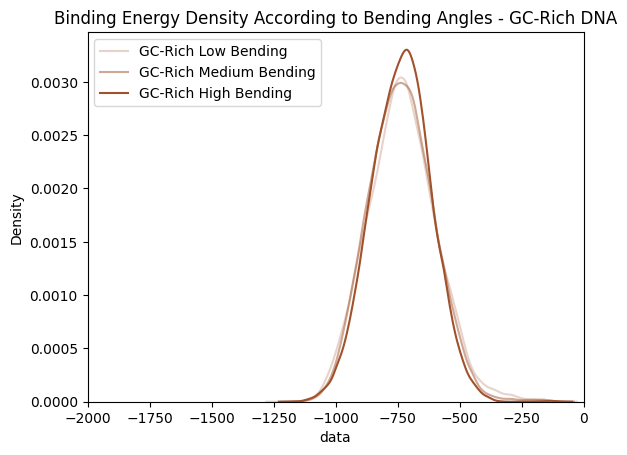

In [22]:
#Plotting 1D KDE plot depciting low/medium/high bending angles of the GC-rich sequence - panel S2C
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(data = low_bending_angle_GC_energies, x = 'data', label = 'GC-Rich Low Bending', color = 'sienna', alpha = 0.25, fill = False)
sns.kdeplot(data = medium_bending_angle_GC_energies, x = 'data', label = 'GC-Rich Medium Bending', color = 'sienna', alpha = 0.5, fill = False)
sns.kdeplot(data = high_bending_angle_GC_energies, x = 'data', label = 'GC-Rich High Bending', color = 'sienna', alpha = 1, fill = False)
plt.legend()
plt.xlim([-2000, 0])
plt.title('Binding Energy Density According to Bending Angles - GC-Rich DNA')
plt.savefig('Binding_Energy_Density_Different_Bending_Angles_GC_Rich_B_DNA_Coul_0.15Thr_Upload.pdf', format = 'pdf')

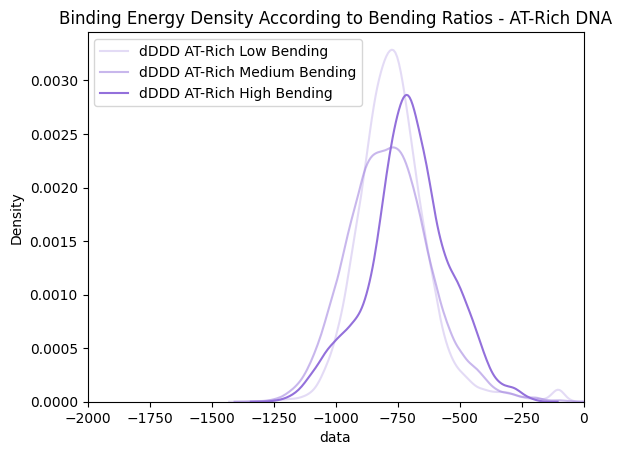

In [23]:
#Plotting 1D KDE plot depciting low/medium/high bending ratios of the AT-rich sequence - panel S3C
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(data = low_bending_ratio_AT_NMG_energies, x = 'data', label = 'dDDD AT-Rich Low Bending', color = 'mediumpurple', alpha = 0.25, fill = False)
sns.kdeplot(data = medium_bending_ratio_AT_NMG_energies, x = 'data', label = 'dDDD AT-Rich Medium Bending', color = 'mediumpurple', alpha = 0.5, fill = False)
sns.kdeplot(data = high_bending_ratio_AT_NMG_energies, x = 'data', label = 'dDDD AT-Rich High Bending', color = 'mediumpurple', alpha = 1, fill = False)
plt.legend()
plt.xlim([-2000, 0])
plt.title('Binding Energy Density According to Bending Ratios - AT-Rich DNA')
plt.savefig('Binding_Energy_Density_Different_Bending_Ratios_AT_Rich_B_DNA_Upload.pdf', format = 'pdf')

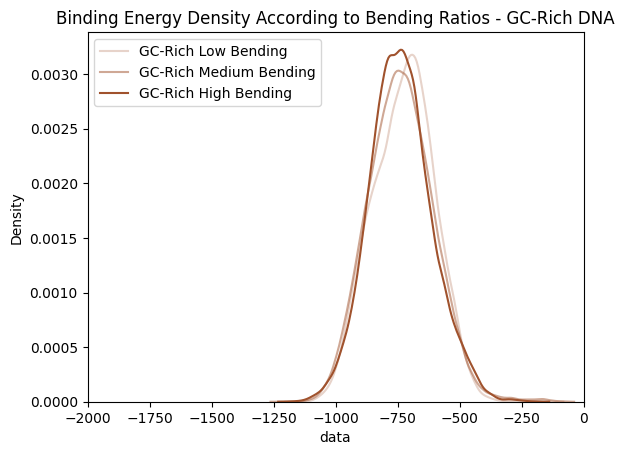

In [24]:
#Plotting 1D KDE plot depciting low/medium/high bending ratios of the GC-rich sequence - panel S3C
plt.rcParams['pdf.fonttype'] = 42
sns.kdeplot(data = low_bending_ratio_GC_energies, x = 'data', label = 'GC-Rich Low Bending', color = 'sienna', alpha = 0.25, fill = False)
sns.kdeplot(data = medium_bending_ratio_GC_energies, x = 'data', label = 'GC-Rich Medium Bending', color = 'sienna', alpha = 0.5, fill = False)
sns.kdeplot(data = high_bending_ratio_GC_energies, x = 'data', label = 'GC-Rich High Bending', color = 'sienna', alpha = 1, fill = False)
plt.legend()
plt.xlim([-2000, 0])
plt.title('Binding Energy Density According to Bending Ratios - GC-Rich DNA')
plt.savefig('Binding_Energy_Density_Different_Bending_Ratios_GC_Rich_B_DNA_Upload.pdf', format = 'pdf')

In [25]:
#A function for extracting interaction energetic values of specific DNA groups from a data file
#Input: the path of the data file
#Output: a dataframe with the energetic values of the DNA groups (bases, sugars, phosphates), each contained within a specific column according to the correpsonding energy term (Coulomb, Van der Waals (LJ))
def Generate_Interaction_Energies_Groups_df(file_name):

    #Reading the data file as lists
    y = np.loadtxt(file_name, comments = ['@', '#'], unpack = True)
    lists = []
    for i in range(len(y)):
        lists.append(list(y[i]))

    #Inserting the lists to a dictionary, which would be converted to a dataframe with suitable column names, according to the energy term
    d = {}
    for i in range(len(lists)):
        d[i] = lists[i]
    df = pd.DataFrame(d)
    df.set_index(0, inplace=True)
    if len(df.columns) == 4:
        df.columns = ['Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14']
    elif len(df.columns) == 12:
        df.columns = ['PB Coul-SR', 'PB LJ-SR', 'PB Coul-14', 'PB LJ-14', 'PS Coul-SR', 'PS LJ-SR', 'PS Coul-14', 'PS LJ-14', 'PPh Coul-SR', 'PPh LJ-SR', 'PPh Coul-14', 'PPh LJ-14']
    
    #Returning the dataframe
    return df

#Reading the data files (of interaction energies of Hfq with the DNA groups) to a list of corresponding dataframes
Hfq_Proximal_B_DNA_CLOSE_files = ["/home_b/yoav/Hfq_Starting_Close_Protein_DNA_Contact/Hfq_Starting_Close_Protein_DNA_Contact_try_energy_groups_I.xvg",
                                  "/home_b/yoav/Hfq_Starting_Close_Protein_DNA_Contact/Hfq_Starting_Close_Protein_DNA_Contact_try_energy_groups_II.xvg",
                                  "/home_b/yoav/Hfq_Starting_Close_Protein_DNA_Contact/Hfq_Starting_Close_Protein_DNA_Contact_try_energy_groups_III.xvg"]
Hfq_Proximal_B_DNA_CLOSE_dfs = []
for file in Hfq_Proximal_B_DNA_CLOSE_files:
    Hfq_Proximal_B_DNA_CLOSE_dfs.append(Generate_Interaction_Energies_Groups_df(file))

#Concating all dataframes to a unified one
concat_Hfq_proximal_B_DNA_CLOSE_df = pd.DataFrame(columns = Hfq_Proximal_B_DNA_CLOSE_dfs[0].columns)
for proximal_B_DNA_df in Hfq_Proximal_B_DNA_CLOSE_dfs:
    concat_Hfq_proximal_B_DNA_CLOSE_df = pd.concat([concat_Hfq_proximal_B_DNA_CLOSE_df, proximal_B_DNA_df], axis = 0, ignore_index = True)

/tmp/ipykernel_294736/3737033366.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_Hfq_proximal_B_DNA_CLOSE_df = pd.concat([concat_Hfq_proximal_B_DNA_CLOSE_df, proximal_B_DNA_df], axis = 0, ignore_index = True)


In [26]:
#Transferring the unified dataframe to one containing all values in one column for the sake of illustration
concat_Hfq_proximal_B_DNA_CLOSE_df['PB_Sum-SR'] = concat_Hfq_proximal_B_DNA_CLOSE_df.copy()['PB Coul-SR'] + concat_Hfq_proximal_B_DNA_CLOSE_df.copy()['PB LJ-SR']
concat_Hfq_proximal_B_DNA_CLOSE_df['PS_Sum-SR'] = concat_Hfq_proximal_B_DNA_CLOSE_df.copy()['PS Coul-SR'] + concat_Hfq_proximal_B_DNA_CLOSE_df.copy()['PS LJ-SR']
concat_Hfq_proximal_B_DNA_CLOSE_df['PPh_Sum-SR'] = concat_Hfq_proximal_B_DNA_CLOSE_df.copy()['PPh Coul-SR'] + concat_Hfq_proximal_B_DNA_CLOSE_df.copy()['PPh LJ-SR']
relevant_cols = ['PB Coul-SR', 'PB LJ-SR', 'PB_Sum-SR', 'PS Coul-SR', 'PS LJ-SR', 'PS_Sum-SR', 'PPh Coul-SR', 'PPh LJ-SR', 'PPh_Sum-SR']
DNA_groups = ['Base'] * 3 + ['Sugar'] * 3 + ['Phosphate'] * 3
col_labels = ['Coulomb', 'LJ', 'Coulomb + LJ'] * 3
one_col_df = pd.DataFrame(columns = ['Energy', 'Col_Type', 'DNA_Group'])
for i_rc, rel_col in enumerate(relevant_cols):
    curr_rel_col_df = pd.DataFrame(columns = ['Energy', 'Col_Type', 'DNA_Group'])
    curr_rel_col_df['Energy'] = concat_Hfq_proximal_B_DNA_CLOSE_df.copy()[rel_col].values
    curr_rel_col_df['Col_Type'] = col_labels[i_rc]
    curr_rel_col_df['DNA_Group'] = DNA_groups[i_rc]
    one_col_df = pd.concat([one_col_df, curr_rel_col_df], axis = 0, ignore_index = True)

/tmp/ipykernel_294736/3540497437.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one_col_df = pd.concat([one_col_df, curr_rel_col_df], axis = 0, ignore_index = True)


In [27]:
#Summing up the Coulomb and LJ (VdW) terms
one_col_df_without_Summed = one_col_df.copy().loc[one_col_df.copy()['Col_Type'] != 'Coulomb + LJ']

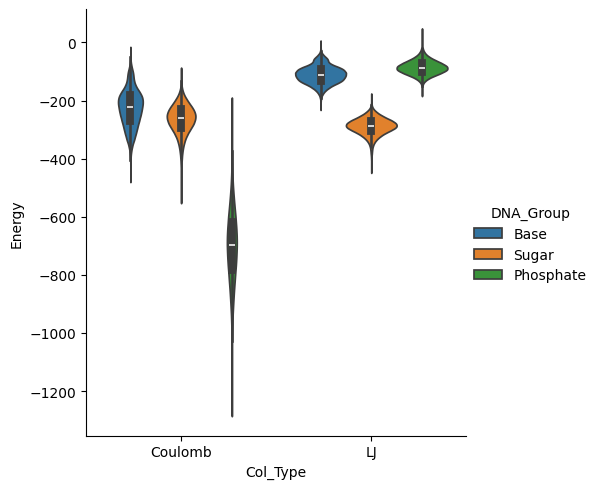

In [ ]:
#Plotting a violin plots of the energies according to their term (Coulomb or LJ), coloring according to the DNA group (bases, sugars, phosphates) - panel S4A
plt.rcParams['pdf.fonttype'] = 42
sns.catplot(kind = 'violin', data = one_col_df_without_Summed, x = 'Col_Type', y = 'Energy', hue = 'DNA_Group')
plt.savefig('violinplots_B-DNA_groups_different_energy_terms_Without_Summed_Upload.pdf', format = 'pdf')

In [29]:
#Reading energy data files of the interaction of Hfq's faces (distal, proximal, lateral/rim) with A-DNA (high salt), A-DNA (regular salt) and B-DNA
Hfq_A_Distal_High_Salt_Files = ["/home_b/yoav/Hfq_Distal_In_Front_Of_A_DNA_High_Salt/Hfq_Distal_A_DNA_GCX12_PR_High_Salt_energy_I.xvg", "/home_b/yoav/Hfq_Distal_In_Front_Of_A_DNA_High_Salt/Hfq_Distal_A_DNA_GCX12_PR_High_Salt_energy_II.xvg", "/home_b/yoav/Hfq_Distal_In_Front_Of_A_DNA_High_Salt/Hfq_Distal_A_DNA_GCX12_PR_High_Salt_energy_III.xvg"]
Hfq_A_Proximal_High_Salt_Files = ["/home_b/yoav/Hfq_A_DNA_GC_High_Salt/Hfq_A_DNA_GCX12_PR_High_Salt_energy_I.xvg", "/home_b/yoav/Hfq_A_DNA_GC_High_Salt/Hfq_A_DNA_GCX12_PR_High_Salt_energy_II.xvg", "/home_b/yoav/Hfq_A_DNA_GC_High_Salt/Hfq_A_DNA_GCX12_PR_High_Salt_energy_III.xvg"]
Hfq_A_Rim_High_Salt_Files = ["/home_b/yoav/Hfq_A_DNA_Rim_High_Salt/Hfq_A_DNA_GCX12_Rim_PR_High_Salt_energy_I.xvg", "/home_b/yoav/Hfq_A_DNA_Rim_High_Salt/Hfq_A_DNA_GCX12_Rim_PR_High_Salt_energy_II.xvg", "/home_b/yoav/Hfq_A_DNA_Rim_High_Salt/Hfq_A_DNA_GCX12_Rim_PR_High_Salt_energy_III.xvg"]
Hfq_A_Distal_Files = ["/home_b/yoav/Hfq_Distal_In_Front_Of_A_DNA/Hfq_Distal_A_DNA_GCX12_PR_energy_I.xvg", "/home_b/yoav/Hfq_Distal_In_Front_Of_A_DNA/Hfq_Distal_A_DNA_GCX12_PR_energy_II.xvg", "/home_b/yoav/Hfq_Distal_In_Front_Of_A_DNA/Hfq_Distal_A_DNA_GCX12_PR_energy_III.xvg"]
Hfq_A_Proximal_Files = ["/home_b/yoav/Hfq_A_DNA_GC/Hfq_A_DNA_GCX12.200ns.energy_I.xvg", "/home_b/yoav/Hfq_A_DNA_GC/Hfq_A_DNA_GCX12.200ns.energy_II.xvg", "/home_b/yoav/Hfq_A_DNA_GC/Hfq_A_DNA_GCX12.200ns.energy_III.xvg"]
Hfq_A_Rim_Files = ["/home_b/yoav/Hfq_A_DNA_Rim/Hfq_A_DNA_GCX12_Rim_energy_I.xvg", "/home_b/yoav/Hfq_A_DNA_Rim/Hfq_A_DNA_GCX12_Rim_energy_II.xvg", "/home_b/yoav/Hfq_A_DNA_Rim/Hfq_A_DNA_GCX12_Rim_energy_III.xvg"]
Hfq_B_Distal_Files = ["/home_b/yoav/Hfq_Distal_In_Front_Of_DNA_NMG/Hfq_DDD_RMG_24_Distal_PR_energy_I.xvg", "/home_b/yoav/Hfq_Distal_In_Front_Of_DNA_NMG/Hfq_DDD_RMG_24_Distal_PR_energy_II.xvg", "/home_b/yoav/Hfq_Distal_In_Front_Of_DNA_NMG/Hfq_DDD_RMG_24_Distal_PR_energy_III.xvg"]
Hfq_B_Proximal_Files = ["/home_b/yoav/Hfq_Starting_Close_Protein_DNA_Contact/Hfq_Starting_Close_Protein_DNA_Contact_try_PR_energy_I.xvg", "/home_b/yoav/Hfq_Starting_Close_Protein_DNA_Contact/Hfq_Starting_Close_Protein_DNA_Contact_try_PR_energy_II.xvg", "/home_b/yoav/Hfq_Starting_Close_Protein_DNA_Contact/Hfq_Starting_Close_Protein_DNA_Contact_try_PR_energy_II.xvg"]
Hfq_B_Rim_Files = ["/home_b/yoav/Hfq_DDD_NMG_24_Rim/Hfq_DDD_NMG_24_Rim_PR_energy_I.xvg", "/home_b/yoav/Hfq_DDD_NMG_24_Rim/Hfq_DDD_NMG_24_Rim_PR_energy_II.xvg", "/home_b/yoav/Hfq_DDD_NMG_24_Rim/Hfq_DDD_NMG_24_Rim_PR_energy_III.xvg"]

#For each set of energy files, converting them to corresponding dataframes
Hfq_A_Distal_High_Salt_Dfs = from_files_to_dfs(Hfq_A_Distal_High_Salt_Files)
Hfq_A_Proximal_High_Salt_Dfs = from_files_to_dfs(Hfq_A_Proximal_High_Salt_Files)
Hfq_A_Rim_High_Salt_Dfs = from_files_to_dfs(Hfq_A_Rim_High_Salt_Files)
Hfq_A_Distal_Dfs = from_files_to_dfs(Hfq_A_Distal_Files)
Hfq_A_Proximal_Dfs = from_files_to_dfs(Hfq_A_Proximal_Files)
Hfq_A_Rim_Dfs = from_files_to_dfs(Hfq_A_Rim_Files)
Hfq_B_Distal_Dfs = from_files_to_dfs(Hfq_B_Distal_Files)
Hfq_B_Proximal_Dfs = from_files_to_dfs(Hfq_B_Proximal_Files)
Hfq_B_Rim_Dfs = from_files_to_dfs(Hfq_B_Rim_Files)

In [ ]:
#A function for concating copies of energy dataframes to a unified one
#Input: list of dataframes
#Output: a unified/concat dataframe
def concat_copies(dfs):

    #Concating each dataframe to the unified one
    concat_df = pd.DataFrame(columns = dfs[0].columns)
    for df in dfs:
        concat_df = pd.concat([concat_df, df], axis = 0, ignore_index = True)
    
    #Returning the unified one
    return concat_df

#Concating the copies of each set of simulation (DNA type and Hfq face)
concat_A_HS_df_Distal = concat_copies(Hfq_A_Distal_High_Salt_Dfs); concat_A_HS_df_Proximal = concat_copies(Hfq_A_Proximal_High_Salt_Dfs); concat_A_HS_df_Rim = concat_copies(Hfq_A_Rim_High_Salt_Dfs)
concat_A_df_Distal = concat_copies(Hfq_A_Distal_Dfs); concat_A_df_Proximal = concat_copies(Hfq_A_Proximal_Dfs); concat_A_df_Rim = concat_copies(Hfq_A_Rim_Dfs)
concat_B_df_Distal = concat_copies(Hfq_B_Distal_Dfs); concat_B_df_Proximal = concat_copies(Hfq_B_Proximal_Dfs); concat_B_df_Rim = concat_copies(Hfq_B_Rim_Dfs)

#Concating all Hfq faces together according to the DNA type
concat_A_HS_dfs = [concat_A_HS_df_Distal, concat_A_HS_df_Proximal, concat_A_HS_df_Rim]
concat_A_dfs = [concat_A_df_Distal, concat_A_df_Proximal, concat_A_df_Rim]
concat_B_dfs = [concat_B_df_Distal, concat_B_df_Proximal, concat_B_df_Rim]

/tmp/ipykernel_294736/1377078931.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_df = pd.concat([concat_df, df], axis = 0, ignore_index = True)
/tmp/ipykernel_294736/1377078931.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_df = pd.concat([concat_df, df], axis = 0, ignore_index = True)
/tmp/ipykernel_294736/1377078931.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude emp

In [31]:
#Concating all DNA types to a unified dataframe
all_dfs = [concat_A_HS_dfs, concat_A_dfs, concat_B_dfs]
faces = ['Distal', 'Proximal', 'Rim'] * 3
conditions = ['A_DNA_HS'] * 3 + ['A_DNA'] * 3 + ['B_DNA'] * 3
concat_all_df = pd.DataFrame(columns = list(all_dfs[0][0].columns) + ['Energy', 'Face', 'Condition'])
for i, curr_all_dfs in enumerate(all_dfs):
    for j, x in enumerate(curr_all_dfs):
        curr_x = x.copy()
        curr_x['Energy'] = curr_x.copy()['PD Coul-SR'] + curr_x.copy()['PD LJ-SR']
        curr_x['Face'] = faces[3 * i + j]
        curr_x['Condition'] = conditions[3 * i + j]
        concat_all_df = pd.concat([concat_all_df, curr_x], axis = 0, ignore_index = True)

/tmp/ipykernel_294736/2841734953.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_all_df = pd.concat([concat_all_df, curr_x], axis = 0, ignore_index = True)


In [32]:
#Dissecting the unified dataframe according to DNA type
concat_all_df_A_HS = concat_all_df.copy().loc[concat_all_df.copy()['Condition'] == 'A_DNA_HS']
concat_all_df_A = concat_all_df.copy().loc[concat_all_df.copy()['Condition'] == 'A_DNA']
concat_all_df_B = concat_all_df.copy().loc[concat_all_df.copy()['Condition'] == 'B_DNA']

In [33]:
#Dissecting the unified dataframe according to Hfq face
concat_all_df_Distal = concat_all_df.copy().loc[concat_all_df.copy()['Face'] == 'Distal']
concat_all_df_Proximal = concat_all_df.copy().loc[concat_all_df.copy()['Face'] == 'Proximal']
concat_all_df_Rim = concat_all_df.copy().loc[concat_all_df.copy()['Face'] == 'Rim']

In [34]:
#A function for plotting 1D KDE plots comparing the interaction energies of Hfq either according to its face or to the DNA type
#Input: two energy dataframes to compare, the energies terms of both embodied by the dataframe columns, a string dictating whether the Hfq face or DNA type would be compared, the two faces/types to be compared, a title to the plots, x label, y label, plot limits
#Output: None
def plot_1D_KDE_plot(x_df, y_df, x_column, y_column, face_or_condition, x_face_or_condition, y_face_or_condition, title, x_label, y_label, lims):
    filt_x_df = x_df.copy().loc[x_df.copy()[face_or_condition] == x_face_or_condition].reset_index()
    filt_y_df = y_df.copy().loc[y_df.copy()[face_or_condition] == y_face_or_condition].reset_index()
    plt.rcParams['pdf.fonttype'] = 42
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.kdeplot(ax = ax, x = filt_x_df[x_column], log_scale = False, cbar = True, fill = False, color = 'lightskyblue', alpha = 1, label = x_label, linewidth = 5)
    sns.kdeplot(ax = ax, x = filt_y_df[y_column], log_scale = False, cbar = True, fill = False, color = 'coral', alpha = 1, label = y_label, linewidth = 5)
    ax.set_xlabel('Interaction Energy [kJ/mole]', fontsize = 20)
    ax.set_ylabel('Density', fontsize = 20)
    ax.set_xlim(lims)
    ax.set_title(title)
    plt.legend()
    fig.savefig('KDE_Plot_1D_AA_' + x_label + '_' + x_column + '&' + y_label + '_' + y_column + 'Upload.pdf', format = 'pdf')

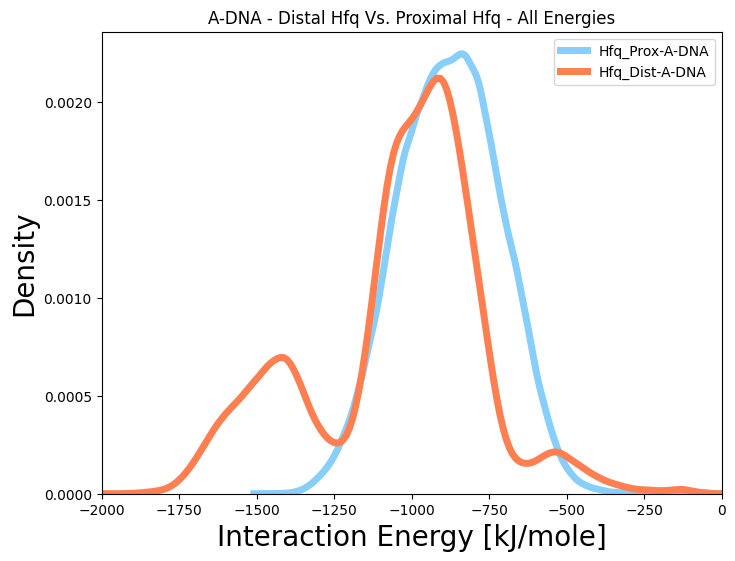

In [ ]:
#Comparing the interaction energies (Coulomb + LJ) of proximal and distal Hfq faces with A-DNA - panel 5A
plot_1D_KDE_plot(concat_all_df_Proximal, concat_all_df_Distal, 'Energy', 'Energy', 'Condition', 'A_DNA', 'A_DNA', 'A-DNA - Distal Hfq Vs. Proximal Hfq - All Energies', 'Hfq_Prox-A-DNA', 'Hfq_Dist-A-DNA', [-2000, 0])

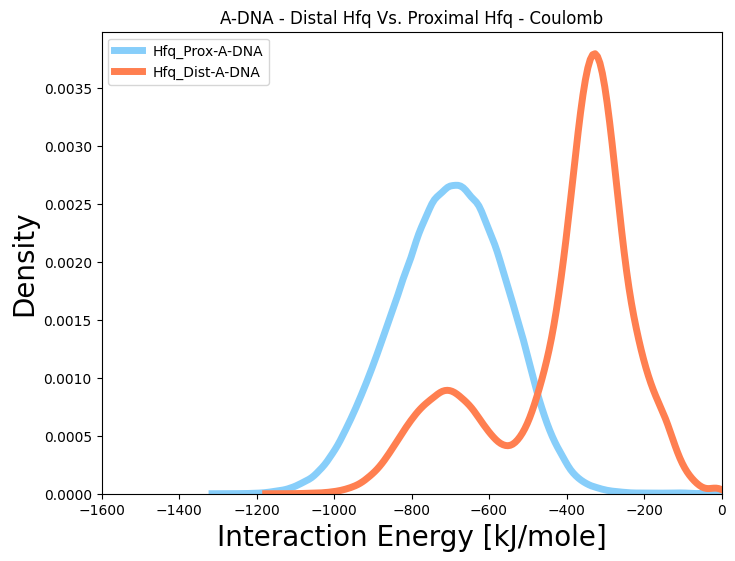

In [ ]:
#Comparing the interaction energies (Coulomb) of proximal and distal Hfq faces with A-DNA - panel 5A
plot_1D_KDE_plot(concat_all_df_Proximal, concat_all_df_Distal, 'PD Coul-SR', 'PD Coul-SR', 'Condition', 'A_DNA', 'A_DNA', 'A-DNA - Distal Hfq Vs. Proximal Hfq - Coulomb', 'Hfq_Prox-A-DNA', 'Hfq_Dist-A-DNA', [-1600, 0])

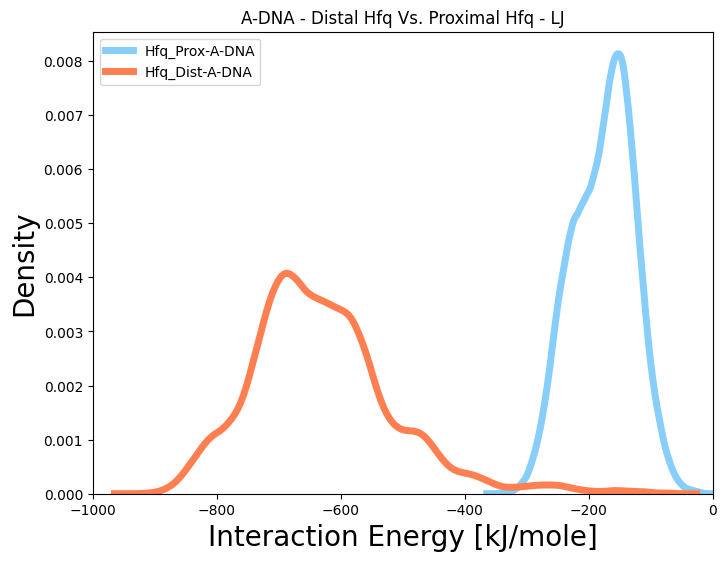

In [ ]:
#Comparing the interaction energies (LJ) of proximal and distal Hfq faces with A-DNA - panel 5A
plot_1D_KDE_plot(concat_all_df_Proximal, concat_all_df_Distal, 'PD LJ-SR', 'PD LJ-SR', 'Condition', 'A_DNA', 'A_DNA', 'A-DNA - Distal Hfq Vs. Proximal Hfq - LJ', 'Hfq_Prox-A-DNA', 'Hfq_Dist-A-DNA',  [-1000, 0])

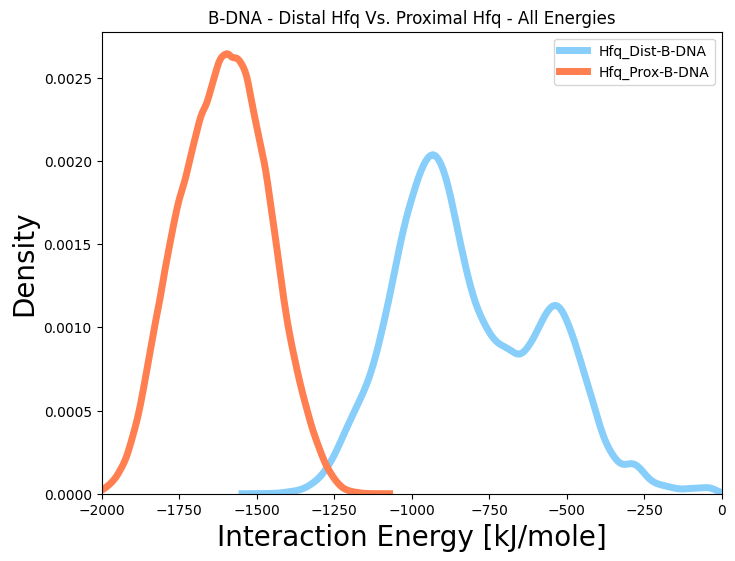

In [ ]:
#Comparing the interaction energies (Coulomb + LJ) of proximal and distal Hfq faces with B-DNA - panel 5B
plot_1D_KDE_plot(concat_all_df_Distal, concat_all_df_Proximal, 'Energy', 'Energy', 'Condition', 'B_DNA', 'B_DNA', 'B-DNA - Distal Hfq Vs. Proximal Hfq - All Energies', 'Hfq_Dist-B-DNA', 'Hfq_Prox-B-DNA', [-2000, 0])

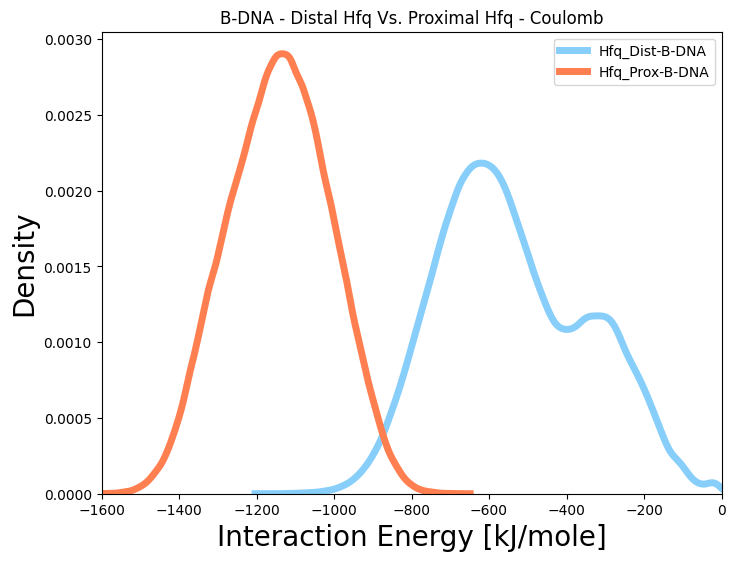

In [ ]:
#Comparing the interaction energies (Coulomb) of proximal and distal Hfq faces with B-DNA - panel 5B
plot_1D_KDE_plot(concat_all_df_Distal, concat_all_df_Proximal, 'PD Coul-SR', 'PD Coul-SR', 'Condition', 'B_DNA', 'B_DNA', 'B-DNA - Distal Hfq Vs. Proximal Hfq - Coulomb', 'Hfq_Dist-B-DNA', 'Hfq_Prox-B-DNA', [-1600, 0])

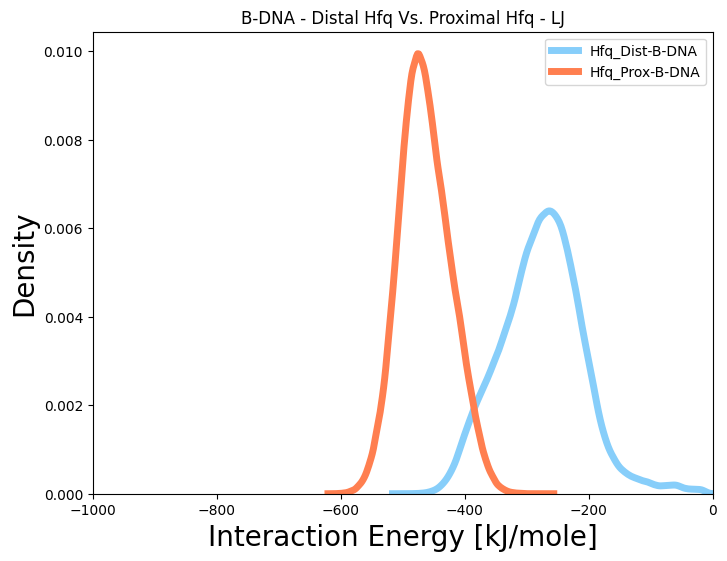

In [ ]:
#Comparing the interaction energies (LJ) of proximal and distal Hfq faces with B-DNA - panel 5B
plot_1D_KDE_plot(concat_all_df_Distal, concat_all_df_Proximal, 'PD LJ-SR', 'PD LJ-SR', 'Condition', 'B_DNA', 'B_DNA', 'B-DNA - Distal Hfq Vs. Proximal Hfq - LJ', 'Hfq_Dist-B-DNA', 'Hfq_Prox-B-DNA',  [-1000, 0])

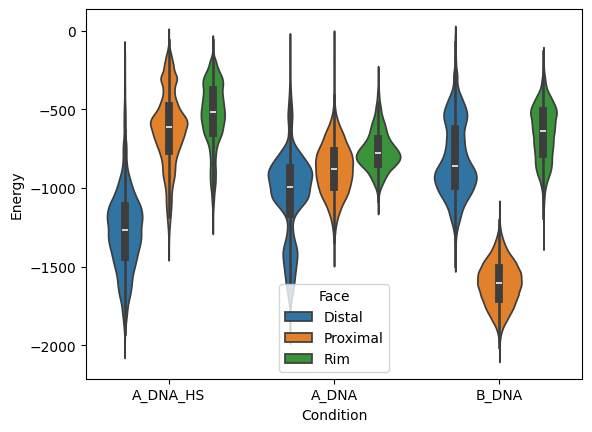

In [ ]:
#Plotting violin plots of interaction energies (Coulomb + LJ) of Hfq with the different DNA types, colored according to Hfq face - panel S4B
plt.rcParams['pdf.fonttype'] = 42
sns.violinplot(data = concat_all_df, x = 'Condition', y = 'Energy', hue = 'Face')
plt.savefig('Violin_Plot_Energy_DNA_Face_Upload.pdf', format = 'pdf')

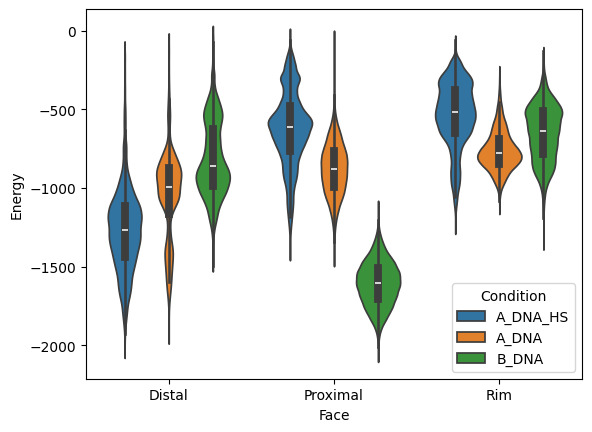

In [ ]:
#Plotting violin plots of interaction energies (Coulomb + LJ) of Hfq with the different Hfq faces, colored according to DNA type - panel S4B
plt.rcParams['pdf.fonttype'] = 42
sns.violinplot(data = concat_all_df, x = 'Face', y = 'Energy', hue = 'Condition')
plt.savefig('Violin_Plot_Energy_Face_DNA_Upload.pdf', format = 'pdf')

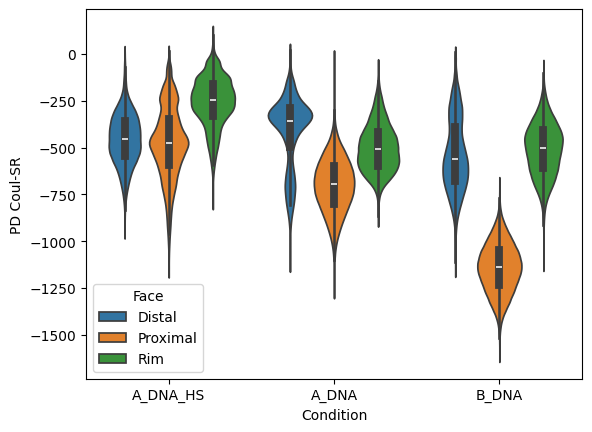

In [ ]:
#Plotting violin plots of interaction energies (Coulomb) of Hfq with the different DNA types, colored according to Hfq's face - panel S4B
plt.rcParams['pdf.fonttype'] = 42
sns.violinplot(data = concat_all_df, x = 'Condition', y = 'PD Coul-SR', hue = 'Face')
plt.savefig('Violin_Plot_Coulomb_DNA_Face_Upload.pdf', format = 'pdf')

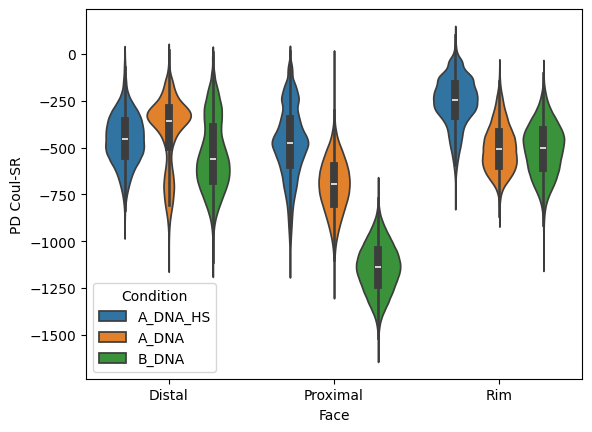

In [ ]:
#Plotting violin plots of interaction energies (Coulomb) of Hfq with the different Hfq faces, colored according to DNA type - panel S4B
plt.rcParams['pdf.fonttype'] = 42
sns.violinplot(data = concat_all_df, x = 'Face', y = 'PD Coul-SR', hue = 'Condition')
plt.savefig('Violin_Plot_Coulomb_Face_DNA_Upload.pdf', format = 'pdf')

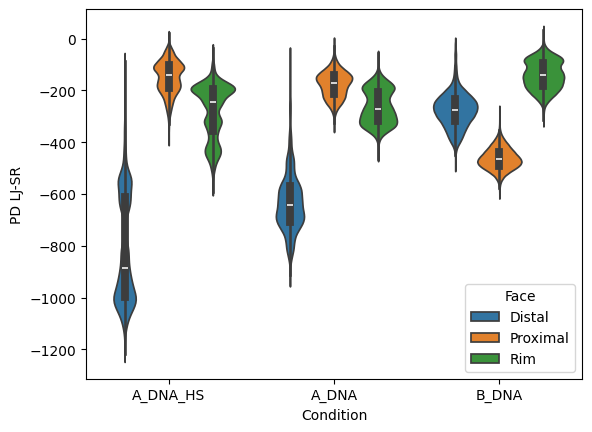

In [ ]:
#Plotting violin plots of interaction energies (LJ) of Hfq with the different DNA types, colored according to Hfq's face - panel S4B
plt.rcParams['pdf.fonttype'] = 42
sns.violinplot(data = concat_all_df, x = 'Condition', y = 'PD LJ-SR', hue = 'Face')
plt.savefig('Violin_Plot_LJ_DNA_Face_Upload.pdf', format = 'pdf')

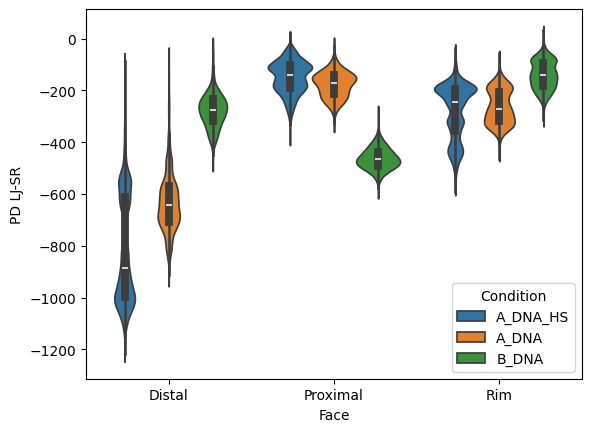

In [ ]:
#Plotting violin plots of interaction energies (LJ) of Hfq with the different Hfq faces, colored according to DNA type - panel S4B
plt.rcParams['pdf.fonttype'] = 42
sns.violinplot(data = concat_all_df, x = 'Face', y = 'PD LJ-SR', hue = 'Condition')
plt.savefig('Violin_Plot_LJ_Face_DNA_Upload.pdf', format = 'pdf')

In [47]:
#A function to concat dataframes with energetic values to a unified dataframe
#Input: a list of dataframes
#Output: a unified dataframe
def Concat_Energies_copies(dfs):
    Ener_Summed_df = pd.concat(dfs, axis = 0, ignore_index = True)
    return Ener_Summed_df

#Reading all interaction energy files and converting them to unified/concat dataframes
Hfq_Energy_Files_list = ["/home_b/yoav/Hfq_DDD_NMG_PosRes/Hfq_DDD_NMG_PosRes_energy.xvg",
                         "/home_b/yoav/Hfq_DDD24_2/interaction_energy.xvg",
                         "/home_b/yoav/Hfq_DDD24_2/Hfq_DDD_NMG_100ns_Continuation_energy.xvg",
                         "/home_b/yoav/Hfq_DDD24_2/Hfq_DDD_NMG_Second_Repeat_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_another_100ns_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_II_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_200ns_first_replicate_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_200ns_second_replicate_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_NMG_24_3/Hfq_DDD_NMG_3_200ns_third_replicate_energy.xvg",
                         "/home_b/yoav/Hfq_NMG_DDD_II_300ns/Hfq_DDD_NMG_24.energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_PosRes/Hfq_DDD_RMG_PosRes_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_regular_MG_24_2/interaction_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_regular_MG_24_2/Hfq_DDD_RMG_100ns_Continuation_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_regular_MG_24_2/Hfq_DDD_RMG_Second_Repeat_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_24_3/Hfq_DDD_RMG_3_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_24_3/Hfq_DDD_RMG_3_another_100ns_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_24_3/Hfq_DDD_RMG_3_II_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_24_3/Hfq_DDD_NMG_3_200ns_first_replicate_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_24_3/Hfq_DDD_NMG_3_200ns_second_replicate_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_RMG_24_3/Hfq_DDD_NMG_3_200ns_third_replicate_energy.xvg",
                         "/home_b/yoav/Hfq_RMG_DDD_II_300ns/Hfq_DDD_RMG_24.energy.xvg",
                         "/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_1_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_2_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_3_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_300ns_1_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_300ns_2_energy.xvg",
                         "/home_b/yoav/Hfq_DDD_GGCC/Hfq_DDD_GGCC_300ns_3_energy.xvg",
                         "/home_b/yoav/Hfq_GGCC_DDD_II_300ns/Hfq_DDD_GGCC.energy.xvg",
                         "/home_b/yoav/Hfq_A_DNA_GC/Hfq_A_DNA_GCX12.energy.I.xvg",
                         "/home_b/yoav/Hfq_A_DNA_GC/Hfq_A_DNA_GCX12.energy.II.xvg",
                         "/home_b/yoav/Hfq_A_DNA_GC/Hfq_A_DNA_GCX12.energy.III.xvg",
                         "/home_b/yoav/Hfq_B_DNA_GC/Hfq_B_DNA_GCX12.energy.I.xvg",
                         "/home_b/yoav/Hfq_B_DNA_GC/Hfq_B_DNA_GCX12.energy.II.xvg",
                         "/home_b/yoav/Hfq_B_DNA_GC/Hfq_B_DNA_GCX12.energy.III.xvg",
                         "/home_b/yoav/Hfq_B_DNA_GC/Hfq_B_DNA_GCX12.energy.PR.I.xvg",
                         "/home_b/yoav/Hfq_B_DNA_GC/Hfq_B_DNA_GCX12.energy.PR.II.xvg",
                         "/home_b/yoav/Hfq_B_DNA_GC/Hfq_B_DNA_GCX12.energy.PR.III.xvg"]

Hfq_A_B_DNA_dfs_list = from_files_to_dfs(Hfq_Energy_Files_list)
concat_df_DDD_NMG_PosRes = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[0:1])
concat_df_DDD_NMG = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[1:11])
concat_df_DDD_RMG_PosRes = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[11:12])
concat_df_DDD_RMG = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[12:22])
concat_df_DDD_GGCC = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[22:29])
concat_df_GCX12_A_DNA_PosRes = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[29:32])
concat_df_GCX12_B_DNA = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[32:35])
concat_df_GCX12_B_DNA_PosRes = Concat_Energies_copies(Hfq_A_B_DNA_dfs_list[35:38])

In [48]:
#Defining relevant energetic copies for analysis - electrostatic (Coulomb) interaction energies of AT-rich 1 and 2 and GC-rich 1 and 2 DNA sequences
AT_NMG_Coulomb = concat_df_DDD_NMG.copy()['PD Coul-SR'] #10 copies
AT_RMG_Coulomb = concat_df_DDD_RMG.copy()['PD Coul-SR'] #10 copies
GC_DDD_Coulomb = concat_df_DDD_GGCC.copy()['PD Coul-SR'] #7 copies
GC_X12_Coulomb = concat_df_GCX12_B_DNA.copy()['PD Coul-SR'] #3 copies

/tmp/ipykernel_294736/339791085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'AT-Rich 1', '', 'AT-Rich 2', '', 'GC-Rich 1', '', 'GC-Rich 2'])


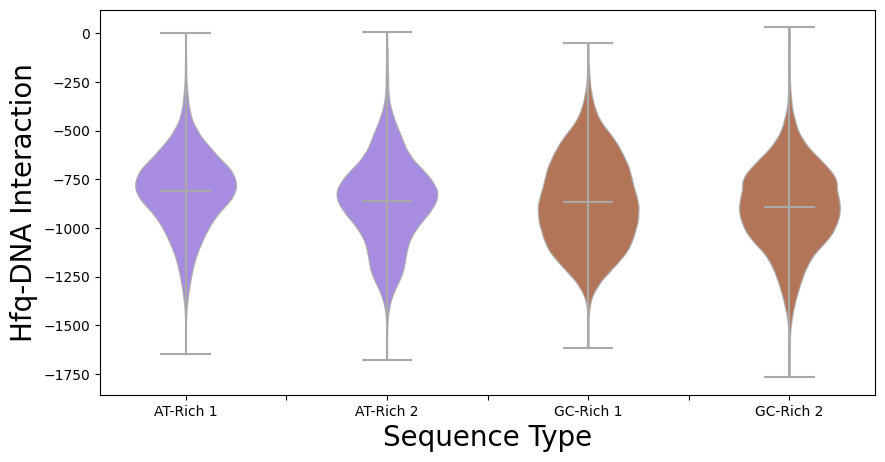

In [49]:
#Plotting violin plots of interaction energies of four sequences - AT-rich 1 and 2 and GC-rich 1 and 2 - panel 4A
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize = (10, 5))
violin_parts = ax.violinplot([AT_NMG_Coulomb, AT_RMG_Coulomb, GC_DDD_Coulomb, GC_X12_Coulomb], showmeans = True)
colors = ['mediumpurple', 'mediumpurple', 'sienna', 'sienna']
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('darkgray')
    pc.set_alpha(0.8)
violin_parts['cbars'].set_color('darkgray')
violin_parts['cmins'].set_color('darkgray')
violin_parts['cmaxes'].set_color('darkgray')
violin_parts['cmeans'].set_color('darkgray')
ax.set_xticklabels(['', 'AT-Rich 1', '', 'AT-Rich 2', '', 'GC-Rich 1', '', 'GC-Rich 2'])
ax.set_xlabel('Sequence Type', fontsize = 20)
ax.set_ylabel('Hfq-DNA Interaction', fontsize = 20)
fig.savefig('Violinplot_Different_AT_GC_Sequences_Interaction_Energies_Upload.pdf', format = 'pdf')